In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [2]:
df = pd.read_csv("fake_job_postings.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
df.shape

(17880, 18)

In [6]:
len(df["department"].value_counts())

1337

In [7]:
for items in df["department"].value_counts().iteritems(): 
    print(items) 

('Sales', 551)
('Engineering', 487)
('Marketing', 401)
('Operations', 270)
('IT', 225)
('Development', 146)
('Product', 112)
('Information Technology', 86)
('Design', 76)
('Technology', 76)
('Customer Service', 73)
('Finance', 69)
('HR', 56)
('tech', 55)
('R&D', 54)
('Creative', 48)
('Retail', 45)
('Client Services', 45)
('Product Development', 36)
('Production', 32)
('Business Development', 32)
('Oil and Gas', 32)
('CSD Relay', 31)
('Administrative', 30)
('Maintenance', 30)
('Accounting', 29)
('Tech', 29)
('Human Resources', 29)
('Technical', 29)
('Administration', 28)
('Clerical', 27)
('Editorial', 26)
('Oil & Energy', 24)
('IT Services', 23)
('Department', 23)
('Legal', 23)
('Performance Marketing', 22)
('Squiz ', 20)
('Project Management', 20)
('Content', 20)
('Admin', 19)
('Commercial', 18)
('Creative Services', 18)
('QA', 18)
('Engineering ', 18)
('Didactics', 17)
('International Growth', 17)
('Support', 17)
('Customer Support', 16)
('Management', 16)
('Customer Success', 16)
('M

In [8]:
columns_to_drop = ['job_id', 'title', 'department', 'industry', 'function']

clean_df = df.drop(columns_to_drop, axis=1)


gc.collect()

0

In [9]:
clean_df.columns

Index(['location', 'salary_range', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'fraudulent'],
      dtype='object')

In [10]:
clean_df.isnull().sum()

location                 346
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
fraudulent                 0
dtype: int64

In [11]:
categorical_columns = ['employment_type', 'required_experience', 'required_education','location']

for col in categorical_columns:
    clean_df[col].fillna("Unknown", inplace=True)

In [12]:
clean_df['employment_type']

0            Other
1        Full-time
2          Unknown
3        Full-time
4        Full-time
           ...    
17875    Full-time
17876    Full-time
17877    Full-time
17878     Contract
17879    Full-time
Name: employment_type, Length: 17880, dtype: object

In [13]:
text_columns = ['company_profile', 'description', 'requirements', 'benefits']

clean_df = clean_df.dropna(subset=text_columns, how='all')

for col in text_columns:
    clean_df[col].fillna(' ', inplace=True)


In [14]:
clean_df['company_profile']

0        We're Food52, and we've created a groundbreaki...
1        90 Seconds, the worlds Cloud Video Production ...
2        Valor Services provides Workforce Solutions th...
3        Our passion for improving quality of life thro...
4        SpotSource Solutions LLC is a Global Human Cap...
                               ...                        
17875    Vend is looking for some awesome new talent to...
17876    WebLinc is the e-commerce platform and service...
17877    We Provide Full Time Permanent Positions for m...
17878                                                     
17879    Vend is looking for some awesome new talent to...
Name: company_profile, Length: 17879, dtype: object

In [15]:
clean_df[clean_df["location"].isna()==True]

,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent


In [16]:
clean_df.isnull().sum()

location                   0
salary_range           15011
company_profile            0
description                0
requirements               0
benefits                   0
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience        0
required_education         0
fraudulent                 0
dtype: int64

In [17]:
unique_salary = clean_df['salary_range'].unique()
print(unique_salary)

[nan '20000-28000' '100000-120000' '120000-150000' '50000-65000'
 '40000-50000' '60-80' '65000-70000' '75-115' '75000-110000' '17000-20000'
 '16000-28000' '95000-115000' '15000-18000' '50000-70000' '45000-60000'
 '30000-40000' '70000-90000' '10000-14000' '50-110' '28000-45000'
 '0-34300' '35000-40000' '9-Dec' '44000-57000' '18500-28000' '55000-75000'
 '30000-35000' '0-0' '20000-40000' '360000-600000' '50000-80000'
 '80000-100000' '52000-78000' '15750-15750' '40000-65000' '45000-50000'
 '30000-37000' '45000-67000' '35000-100000' '180000-216000' '45000-65000'
 '28000-32000' '0-1000' '36000-40000' '80000-110000' '35000-73000'
 '19000-19000' '60000-120000' '120000-15000000' '42000-55000'
 '90000-120000' '100000-150000' '28000-38000' '1600-1700' '50000-60000'
 '30000-70000' '32000-40000' '50-100' '9000-17000' '23040-28800' '105-110'
 '13000-16000' '100000-180000' '45000-55000' '9000-12000' '50000-90000'
 '25000-42000' '40000-60000' '600000-750000' '120000-170000' '45000-90000'
 '25000-30000

In [18]:
clean_df['salary_range'].unique()[0:30]

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '9-Dec', '44000-57000', '18500-28000',
       '55000-75000', '30000-35000', '0-0', '20000-40000'], dtype=object)

In [19]:
new = clean_df['salary_range'].str.split("-", n = 1, expand = True) 
clean_df['salary_range_min']= new[0]
clean_df['salary_range_max']= new[1]

clean_df['salary_range_min'].fillna('0', inplace=True)
clean_df['salary_range_max'].fillna('0', inplace=True)

In [20]:
def remove_string(x):
    if not x.isnumeric(): 
        val = '0'
    else:
        val = x
    return val

clean_df['salary_range_min'] = clean_df['salary_range_min'].apply(lambda x: remove_string(x))
clean_df['salary_range_max'] = clean_df['salary_range_max'].apply(lambda x: remove_string(x))

clean_df.drop('salary_range', axis=1, inplace = True) 

In [21]:
clean_df.salary_range_min

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: salary_range_min, Length: 17879, dtype: object

In [22]:
clean_df["salary_range_max"].value_counts()

0          15175
50000        168
100000       124
40000        116
80000        113
           ...  
53000          1
8582080        1
62400          1
4000000        1
3800           1
Name: salary_range_max, Length: 272, dtype: int64

In [23]:
clean_df.isnull().sum()

location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
fraudulent             0
salary_range_min       0
salary_range_max       0
dtype: int64

In [24]:
df_cleaned = clean_df.copy()

In [25]:
df_cleaned

,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,salary_range_min,salary_range_max
0,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,0,0,0
1,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,0,0,0
2,"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,Unknown,Unknown,Unknown,0,0,0
3,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0,0,0
4,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Unknown,0,0,0
17876,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,0,0
17877,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,Unknown,Unknown,0,0,0
17878,"NG, LA, Lagos",,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,0,0,0


In [26]:
location = df_cleaned["location"]
location_splitted = list(location.str.split(', ').values)

In [27]:
location_splitted

[['US', 'NY', 'New York'],
 ['NZ', '', 'Auckland'],
 ['US', 'IA', 'Wever'],
 ['US', 'DC', 'Washington'],
 ['US', 'FL', 'Fort Worth'],
 ['US', 'MD', ''],
 ['DE', 'BE', 'Berlin'],
 ['US', 'CA', 'San Francisco'],
 ['US', 'FL', 'Pensacola'],
 ['US', 'AZ', 'Phoenix'],
 ['US', 'NJ', 'Jersey City'],
 ['GB', 'LND', 'London'],
 ['US', 'CT', 'Stamford'],
 ['US', 'FL', 'Orlando'],
 ['AU', 'NSW', 'Sydney'],
 ['SG', '01', 'Singapore'],
 ['IL', '', 'Tel Aviv', 'Israel'],
 ['GB', 'SOS', 'Southend-on-Sea'],
 ['US', 'NY', 'New York'],
 ['US', 'PA', 'USA Northeast'],
 ['US', 'TX', 'Austin'],
 ['NZ', 'N', 'Auckland'],
 ['AE', '', ''],
 ['US', 'CA', 'Carlsbad'],
 ['GB', 'LND', 'London'],
 ['US', 'NY', 'New York '],
 ['SG', '', ''],
 ['AE', 'AZ', 'Abudhabi'],
 ['US', 'MO', 'St. Louis'],
 ['CA', 'ON', 'Toronto'],
 ['US', 'MA', 'Waltham'],
 ['US', 'KS', ''],
 ['US', 'WA', 'Everett'],
 ['US', 'CA', 'San Ramon'],
 ['GB', 'LND', ''],
 ['US', 'NY', 'Saint Bonaventure'],
 ['US', 'NY', 'Yonkers'],
 ['US', 'TX', 'H

In [28]:
for location_index, location in enumerate(location_splitted):
    if location is np.nan:
        location_splitted[location_index] = ['Unpecified'] * 3
    else:
        for element_index, element in enumerate(location):
            if element == '':
                location[element_index] = 'Unpecified'

In [29]:
location_splitted

[['US', 'NY', 'New York'],
 ['NZ', 'Unpecified', 'Auckland'],
 ['US', 'IA', 'Wever'],
 ['US', 'DC', 'Washington'],
 ['US', 'FL', 'Fort Worth'],
 ['US', 'MD', 'Unpecified'],
 ['DE', 'BE', 'Berlin'],
 ['US', 'CA', 'San Francisco'],
 ['US', 'FL', 'Pensacola'],
 ['US', 'AZ', 'Phoenix'],
 ['US', 'NJ', 'Jersey City'],
 ['GB', 'LND', 'London'],
 ['US', 'CT', 'Stamford'],
 ['US', 'FL', 'Orlando'],
 ['AU', 'NSW', 'Sydney'],
 ['SG', '01', 'Singapore'],
 ['IL', 'Unpecified', 'Tel Aviv', 'Israel'],
 ['GB', 'SOS', 'Southend-on-Sea'],
 ['US', 'NY', 'New York'],
 ['US', 'PA', 'USA Northeast'],
 ['US', 'TX', 'Austin'],
 ['NZ', 'N', 'Auckland'],
 ['AE', 'Unpecified', 'Unpecified'],
 ['US', 'CA', 'Carlsbad'],
 ['GB', 'LND', 'London'],
 ['US', 'NY', 'New York '],
 ['SG', 'Unpecified', 'Unpecified'],
 ['AE', 'AZ', 'Abudhabi'],
 ['US', 'MO', 'St. Louis'],
 ['CA', 'ON', 'Toronto'],
 ['US', 'MA', 'Waltham'],
 ['US', 'KS', 'Unpecified'],
 ['US', 'WA', 'Everett'],
 ['US', 'CA', 'San Ramon'],
 ['GB', 'LND', 'Un

In [30]:
for loc_ind, loc in enumerate(location_splitted):
    if len(loc) > 3:
        print(loc_ind, loc)

16 ['IL', 'Unpecified', 'Tel Aviv', 'Israel']
69 ['US', 'CA', 'Menlo Park', 'CA']
98 ['US', 'Unpecified', 'Stocton', 'CA']
215 ['US', 'CA', 'Bakersfield', 'CA / Mt. Poso']
219 ['SA', '01', 'Riyadh', 'Olaya']
314 ['EG', 'C', 'Cairo', 'Nasr City']
343 ['GR', 'I', 'Neo Iraklio', 'Athens']
440 ['GB', 'UKM', 'Stockholm', 'Sweden']
695 ['GB', 'Unpecified', 'Angel', 'London']
980 ['US', 'CO', 'Boulder', 'CO']
1725 ['US', 'TX', 'Austin', 'San Antonio', 'Houston']
2015 ['EG', 'C', 'Cairo', 'Nasr City']
2094 ['US', 'NJ', 'Hillside', 'NJ']
2320 ['GR', 'I', 'Vrilissia ', 'Greece']
2362 ['GR', 'E', 'Larisa', 'Volos']
2694 ['GR', 'I', 'Chalandri', 'Athens']
2745 ['US', 'NJ', 'Whitehouse station', 'Unpecified']
2947 ['US', 'DC', 'Washington', 'DC']
3062 ['US', 'CA', 'Salinas', 'CA']
3451 ['US', 'CA', 'Fresno', 'CA']
3630 ['SA', '01', 'Riyadh', 'Olaya']
4073 ['US', 'FL', 'Okeechobee', 'FL']
4117 ['GR', 'I', 'Athens', 'Rouf']
4221 ['CA', 'Unpecified', 'Rio Rancho', 'NM']
4333 ['GR', 'I', 'Kifisia', 'At

In [31]:
location_splitted = list(map(lambda loc: list(loc), location_splitted))

In [32]:
location_splitted

[['US', 'NY', 'New York'],
 ['NZ', 'Unpecified', 'Auckland'],
 ['US', 'IA', 'Wever'],
 ['US', 'DC', 'Washington'],
 ['US', 'FL', 'Fort Worth'],
 ['US', 'MD', 'Unpecified'],
 ['DE', 'BE', 'Berlin'],
 ['US', 'CA', 'San Francisco'],
 ['US', 'FL', 'Pensacola'],
 ['US', 'AZ', 'Phoenix'],
 ['US', 'NJ', 'Jersey City'],
 ['GB', 'LND', 'London'],
 ['US', 'CT', 'Stamford'],
 ['US', 'FL', 'Orlando'],
 ['AU', 'NSW', 'Sydney'],
 ['SG', '01', 'Singapore'],
 ['IL', 'Unpecified', 'Tel Aviv', 'Israel'],
 ['GB', 'SOS', 'Southend-on-Sea'],
 ['US', 'NY', 'New York'],
 ['US', 'PA', 'USA Northeast'],
 ['US', 'TX', 'Austin'],
 ['NZ', 'N', 'Auckland'],
 ['AE', 'Unpecified', 'Unpecified'],
 ['US', 'CA', 'Carlsbad'],
 ['GB', 'LND', 'London'],
 ['US', 'NY', 'New York '],
 ['SG', 'Unpecified', 'Unpecified'],
 ['AE', 'AZ', 'Abudhabi'],
 ['US', 'MO', 'St. Louis'],
 ['CA', 'ON', 'Toronto'],
 ['US', 'MA', 'Waltham'],
 ['US', 'KS', 'Unpecified'],
 ['US', 'WA', 'Everett'],
 ['US', 'CA', 'San Ramon'],
 ['GB', 'LND', 'Un

In [33]:
for loc_ind, loc in enumerate(location_splitted):
    if len(loc) > 3:
        location_splitted[loc_ind] = loc[:2] + [', '.join(loc[2:])]
    if len(loc) < 3:
        location_splitted[loc_ind] += ['Unpecified'] * 2

In [34]:
any([len(loc) != 3 for loc in location_splitted])

False

In [35]:
data_location = pd.DataFrame(location_splitted, columns=['country', 'state', 'city'])
data_location

,country,state,city
0,US,NY,New York
1,NZ,Unpecified,Auckland
2,US,IA,Wever
3,US,DC,Washington
4,US,FL,Fort Worth
...,...,...,...
17874,CA,ON,Toronto
17875,US,PA,Philadelphia
17876,US,TX,Houston
17877,NG,LA,Lagos


In [36]:
final_df = pd.concat([df_cleaned, data_location], axis=1)

In [37]:
final_df

,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,salary_range_min,salary_range_max,country,state,city
0,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0.0,1.0,0.0,Other,Internship,Unknown,0.0,0,0,US,NY,New York
1,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0.0,1.0,0.0,Full-time,Not Applicable,Unknown,0.0,0,0,NZ,Unpecified,Auckland
2,"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0.0,1.0,0.0,Unknown,Unknown,Unknown,0.0,0,0,US,IA,Wever
3,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0.0,1.0,0.0,Full-time,Mid-Senior level,Bachelor's Degree,0.0,0,0,US,DC,Washington
4,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0.0,1.0,1.0,Full-time,Mid-Senior level,Bachelor's Degree,0.0,0,0,US,FL,Fort Worth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0.0,1.0,1.0,Full-time,Mid-Senior level,Bachelor's Degree,0.0,0,0,US,TX,Houston
17877,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0.0,0.0,0.0,Full-time,Unknown,Unknown,0.0,0,0,NG,LA,Lagos
17878,"NG, LA, Lagos",,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0.0,0.0,1.0,Contract,Not Applicable,Professional,0.0,0,0,NZ,N,Wellington
17879,"NZ, N, Wellington",Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,,0.0,1.0,1.0,Full-time,Mid-Senior level,Unknown,0.0,0,0,NaN,NaN,NaN


In [38]:
final_df.drop('location', axis=1, inplace=True)

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 0 to 17513
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_profile      17879 non-null  object 
 1   description          17879 non-null  object 
 2   requirements         17879 non-null  object 
 3   benefits             17879 non-null  object 
 4   telecommuting        17879 non-null  float64
 5   has_company_logo     17879 non-null  float64
 6   has_questions        17879 non-null  float64
 7   employment_type      17879 non-null  object 
 8   required_experience  17879 non-null  object 
 9   required_education   17879 non-null  object 
 10  fraudulent           17879 non-null  float64
 11  salary_range_min     17879 non-null  object 
 12  salary_range_max     17879 non-null  object 
 13  country              17879 non-null  object 
 14  state                17879 non-null  object 
 15  city                 17879 non-null 

In [40]:
increment = 0
for items in final_df["country"].value_counts().iteritems(): 
    print(items) 
    increment += 1
print(increment)

('US', 10656)
('GB', 2384)
('GR', 940)
('CA', 457)
('DE', 383)
('Unknown', 346)
('NZ', 333)
('IN', 276)
('AU', 214)
('PH', 132)
('NL', 127)
('BE', 117)
('IE', 114)
('SG', 80)
('HK', 77)
('PL', 75)
('EE', 72)
('IL', 72)
('FR', 70)
('ES', 66)
('AE', 54)
('EG', 52)
('SE', 49)
('RO', 46)
('DK', 42)
('ZA', 40)
('BR', 36)
('IT', 31)
('FI', 29)
('PK', 27)
('LT', 23)
('MY', 21)
('QA', 21)
('JP', 20)
('RU', 20)
('MX', 18)
('PT', 18)
('BG', 17)
('TR', 17)
('CN', 15)
('CH', 15)
('SA', 15)
('MU', 14)
('HU', 14)
('AT', 14)
('ID', 13)
('MT', 13)
('UA', 13)
('CY', 11)
('IQ', 10)
('KR', 10)
('TH', 10)
('NG', 10)
('AR', 9)
('LU', 9)
('BH', 9)
('BY', 9)
('PA', 9)
('NO', 8)
('RS', 7)
('KE', 7)
('CZ', 6)
('LV', 6)
('VN', 4)
('NI', 4)
('TT', 4)
('TW', 4)
('VI', 3)
('KW', 2)
('TN', 2)
('AM', 2)
('IS', 2)
('LK', 2)
('SK', 2)
('CL', 2)
('ZM', 2)
('BD', 2)
('HR', 1)
('JM', 1)
('KZ', 1)
('SV', 1)
('CM', 1)
('PE', 1)
('AL', 1)
('GH', 1)
('MA', 1)
('SI', 1)
('CO', 1)
('SD', 1)
('UG', 1)
('KH', 1)
91


In [41]:
import seaborn as sns

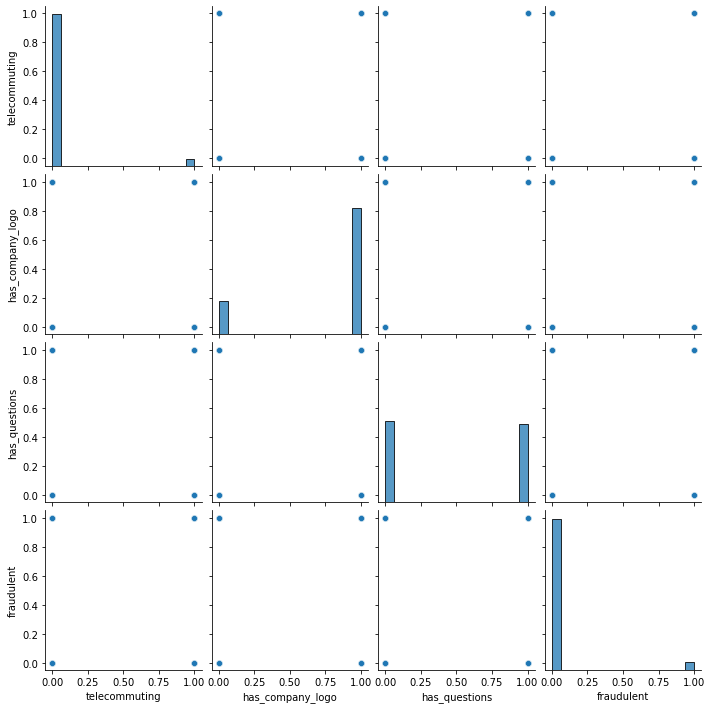

In [42]:
sns.pairplot(final_df)

In [49]:
fraud_postings = final_df[final_df.fraudulent==1]
non_fraud_postings = final_df[final_df.fraudulent==0]


C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


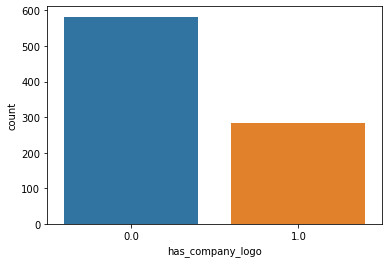

C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


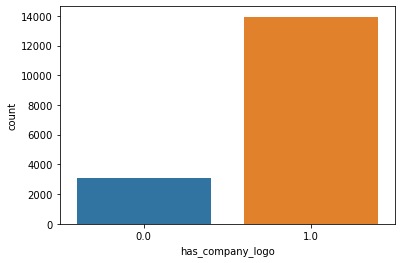

In [50]:
sns.countplot(fraud_postings.has_company_logo)
plt.show()
sns.countplot(non_fraud_postings.has_company_logo)
plt.show()

As we can see majorly fraud postings dont have company logos where as nonfraud postings have company logos

C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


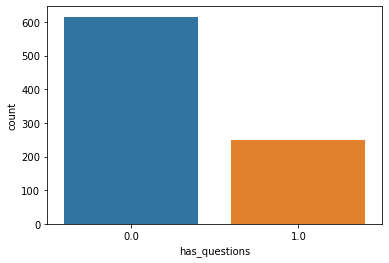

C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


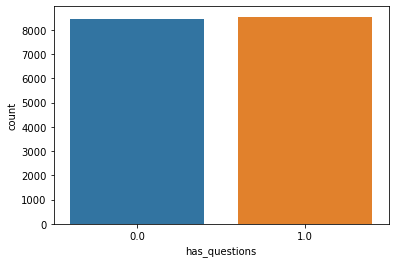

In [51]:
sns.countplot(fraud_postings.has_questions)
plt.show()
sns.countplot(non_fraud_postings.has_questions)
plt.show()

has_questions is not a good feature to tell the differenc ebetween fraud postings and non fraud postings

C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


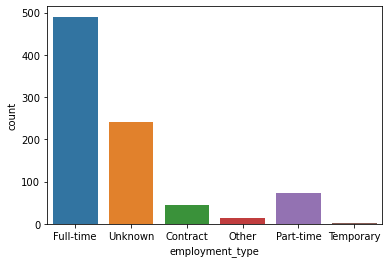

C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


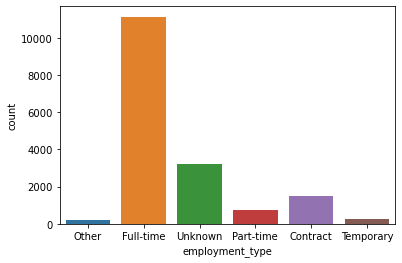

In [52]:
sns.countplot(fraud_postings.employment_type)
plt.show()
sns.countplot(non_fraud_postings.employment_type)
plt.show()

C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


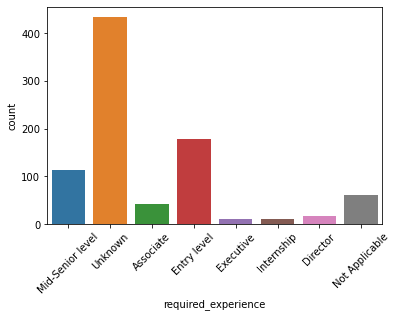

C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


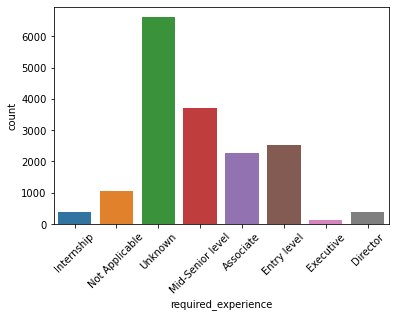

In [54]:
sns.countplot(fraud_postings.required_experience)
plt.xticks(rotation=45)
plt.show()
sns.countplot(non_fraud_postings.required_experience)
plt.xticks(rotation=45)
plt.show()

Fraud postings are majorly seen in mid senior level, entry level

C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


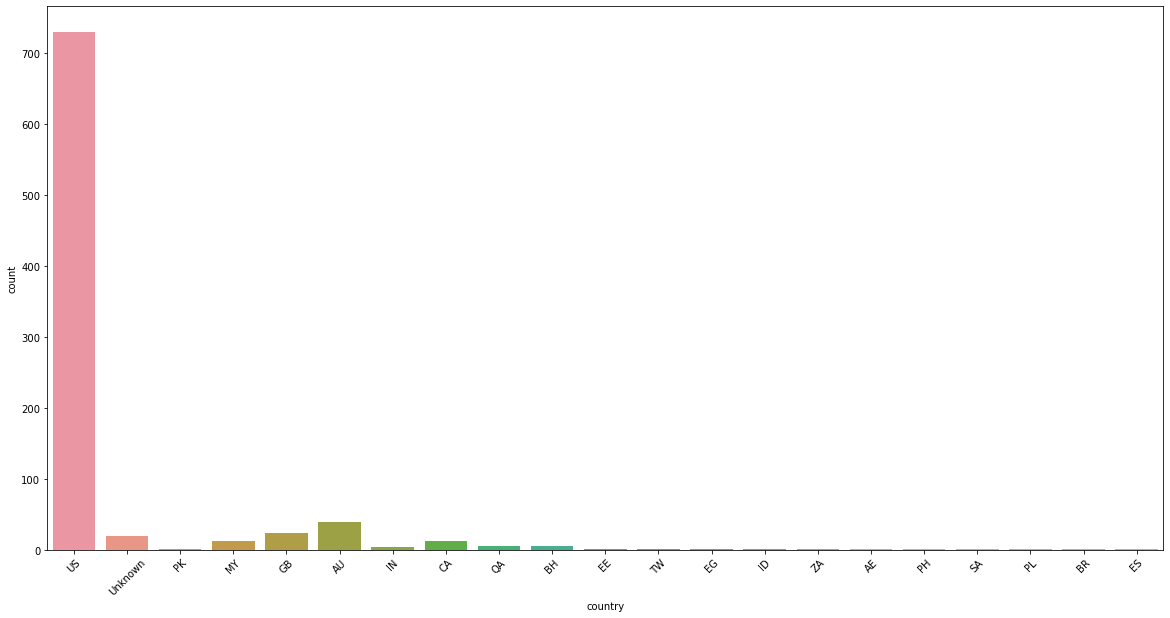

C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


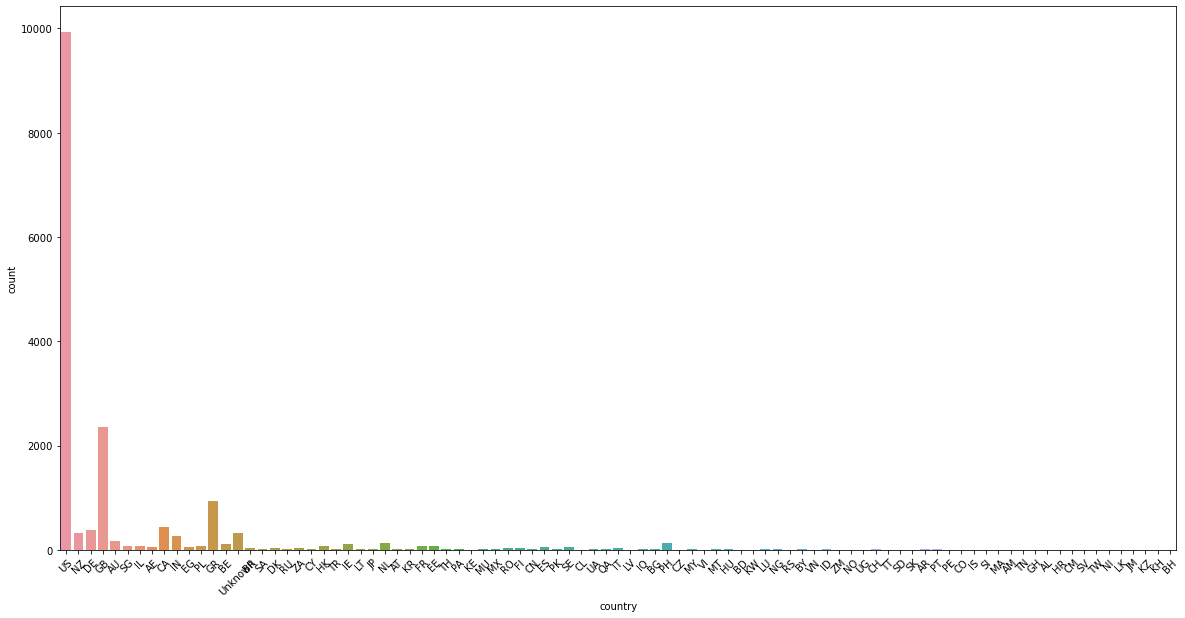

In [65]:
plt.figure(figsize=(20,10))
sns.countplot(fraud_postings.country)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(20,10))
sns.countplot(non_fraud_postings.country)
plt.xticks(rotation=45)
plt.show()